In [1]:
import pandas as pd
from bidi.algorithm import get_display
import arabic_reshaper
import matplotlib.pyplot as plt
import warnings
import seaborn
import numpy as np
import seaborn as sb
import sklearn
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('DATA1.csv')

In [3]:
data

,shmare_parvande,Gender,Age,admission,Release_date,ت تشخیص متاستاز مغزی,ت تشخیص متاستاز بیضه,گروه خونی,تشخیص,مورفولوژی,...,MCHC1,PLT1,WBC2,RBC2,HGB2,HCT2,MCV1.1,MCH2,MCHC2,PLT2
0,01--20--59,مرد,3,82/10/2,86/2/25,NaN,82/10/17,B-,ALL,L1,...,31.3,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00--98--82,مرد,11,82/8/13,85/12/25,NaN,NaN,O+,ALL,L1,...,29.8,291.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00--96-44,مرد,5,82/8/8,85/10/2,NaN,NaN,O+,ALL,NaN,...,31.4,307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00--02--01,زن,10,81/12/12,91/12/8,90/8/25,NaN,B+,ALL,NaN,...,34.1,200.0,7.3,5.00,12.1,36.5,73.0,24.2,33.2,6
4,00--34--99,زن,11,82/5/18,85/6/21,NaN,NaN,O+,ALL,L1,...,28.5,212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,13--43--28,زن,1,89/11/17,89/11/18,NaN,NaN,O+,AML,M7,...,36.8,370.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,18--15--93,مرد,3,92/5/29,92/8/18,92/7/5,NaN,O+,AML,NaN,...,31.1,518.0,3.1,2.70,6.7,20.3,75.2,24.8,33.0,102
256,16--13--49,مرد,10,91/5/10,93/3/25,NaN,NaN,B+,AML,M6,...,30.5,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,15--85--49,مرد,2,91/3/16,91/4/11,91/3/16,NaN,A+,AML,NaN,...,31.6,22.0,61.6,1.74,4.2,13.3,76.4,24.1,31.6,22


# اطلاعات آماری    statics analysis

In [4]:
data.describe()

,Age,HGB3,HCT3,MCV3,MCH3,MCHC3,WBC1,RBC1,HGB1,HCT1,...,MCH1,MCHC1,PLT1,WBC2,RBC2,HGB2,HCT2,MCV1.1,MCH2,MCHC2
count,259.000000,25.000000,25.000000,25.000000,25.000000,25.000000,257.000000,257.000000,257.000000,257.000000,...,257.000000,257.000000,257.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,6.196911,10.340000,31.952000,84.380000,27.276000,32.368000,32.305837,3.164086,8.540856,26.881712,...,28.242412,32.047082,143.300000,10.141935,3.617419,10.229032,31.393548,86.551613,28.177419,32.577419
std,3.990763,2.246108,6.477083,6.535671,2.277477,1.933632,61.495570,1.066950,2.811473,9.455018,...,15.033430,3.243371,150.655807,20.742561,0.859054,2.565176,7.970735,8.106659,2.583629,1.866317
min,1.000000,6.100000,18.900000,72.000000,22.400000,27.900000,0.700000,0.610000,1.800000,6.300000,...,17.200000,8.300000,5.000000,0.100000,1.740000,4.200000,13.300000,68.500000,22.900000,29.500000
25%,3.000000,8.600000,27.200000,78.500000,26.200000,31.200000,3.400000,2.370000,6.500000,19.700000,...,25.200000,30.500000,26.000000,2.300000,2.950000,8.350000,26.250000,80.650000,26.650000,31.600000
50%,5.000000,10.000000,30.900000,85.200000,27.200000,32.400000,8.000000,3.160000,8.300000,26.900000,...,27.400000,32.100000,75.000000,4.600000,3.550000,10.700000,33.300000,87.800000,28.400000,32.400000
75%,9.500000,12.200000,37.200000,88.100000,28.600000,33.500000,24.700000,3.950000,10.700000,33.300000,...,29.200000,33.700000,217.000000,7.300000,4.375000,12.100000,36.400000,91.600000,29.100000,33.600000
max,15.000000,15.100000,42.600000,96.800000,31.300000,36.200000,420.000000,6.050000,16.900000,95.300000,...,261.000000,44.200000,675.000000,104.500000,5.160000,14.900000,46.700000,105.700000,35.600000,39.100000


# Data Cleaning

اصلاح ستون های مد نظر و جایگزینی مقادیر آن با مقادیر انکد شده

In [5]:
datacopy = data.copy()

In [6]:
datacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   shmare_parvande       259 non-null    object 
 1   Gender                259 non-null    object 
 2   Age                   259 non-null    int64  
 3   admission             259 non-null    object 
 4   Release_date          259 non-null    object 
 5   ت تشخیص متاستاز مغزی  31 non-null     object 
 6   ت تشخیص متاستاز بیضه  24 non-null     object 
 7   گروه خونی             259 non-null    object 
 8   تشخیص                 259 non-null    object 
 9   مورفولوژی             62 non-null     object 
 10  اسپلنومگالی           254 non-null    object 
 11  هپاتومگالی            254 non-null    object 
 12  نوع درمان             255 non-null    object 
 13  نتیجه ی درمان         60 non-null     object 
 14  توضیحات               61 non-null     object 
 15  WBC3                  2

In [7]:
datacopy['ت تشخیص متاستاز مغزی'] = datacopy['ت تشخیص متاستاز مغزی'].notna().astype(int)

In [8]:
datacopy['ت تشخیص متاستاز بیضه'] = datacopy['ت تشخیص متاستاز بیضه'].notna().astype(int)

In [9]:
datacopy['نتیجه ی درمان'] = datacopy['نتیجه ی درمان'].notna().astype(int)

In [10]:
datacopy['اسپلنومگالی'] = datacopy['اسپلنومگالی'].notna().astype(int)

In [11]:
datacopy['هپاتومگالی'] = datacopy['هپاتومگالی'].notna().astype(int)

In [12]:
datacopy.replace({'Gender':{'مرد':1,'زن':0}},inplace=True)

In [13]:
datacopy['Age'] = datacopy['Age'].astype(int)

In [14]:
datacopy['WBC1'] = datacopy['WBC1'].astype(float)

# OneHot coding Data and remove columns

In [15]:
blood_group = pd.get_dummies(datacopy['گروه خونی']).astype(int)

In [16]:
datacopy.replace({'تشخیص':{"ALL":1,"AML":0}},inplace=True)

In [17]:
datacopy = pd.concat([datacopy,blood_group],axis=1)

In [18]:
datacopy = datacopy.drop('گروه خونی',axis=1)


# Make Clean custom Dataset for analyse

#### data before make custom dataset

In [19]:
datacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   shmare_parvande       259 non-null    object 
 1   Gender                259 non-null    int64  
 2   Age                   259 non-null    int32  
 3   admission             259 non-null    object 
 4   Release_date          259 non-null    object 
 5   ت تشخیص متاستاز مغزی  259 non-null    int32  
 6   ت تشخیص متاستاز بیضه  259 non-null    int32  
 7   تشخیص                 259 non-null    int64  
 8   مورفولوژی             62 non-null     object 
 9   اسپلنومگالی           259 non-null    int32  
 10  هپاتومگالی            259 non-null    int32  
 11  نوع درمان             255 non-null    object 
 12  نتیجه ی درمان         259 non-null    int32  
 13  توضیحات               61 non-null     object 
 14  WBC3                  25 non-null     object 
 15  RBC3                  2

#### ستون های اضافی جهت تحلیل درست الگوریتم ها حذف شده اند (در زیر)

In [20]:
dataclean = datacopy.drop(['shmare_parvande','admission','Release_date','مورفولوژی','نوع درمان','توضیحات','WBC3','RBC3','HGB3','HCT3','MCV3','MCH3','MCHC3','PLT3','WBC2','RBC2','HGB2','HCT2','MCV1','MCH2','MCHC2','PLT2','MCV1.1'],axis=1)

In [21]:
dataclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                259 non-null    int64  
 1   Age                   259 non-null    int32  
 2   ت تشخیص متاستاز مغزی  259 non-null    int32  
 3   ت تشخیص متاستاز بیضه  259 non-null    int32  
 4   تشخیص                 259 non-null    int64  
 5   اسپلنومگالی           259 non-null    int32  
 6   هپاتومگالی            259 non-null    int32  
 7   نتیجه ی درمان         259 non-null    int32  
 8   WBC1                  257 non-null    float64
 9   RBC1                  257 non-null    float64
 10  HGB1                  257 non-null    float64
 11  HCT1                  257 non-null    float64
 12  MCH1                  257 non-null    float64
 13  MCHC1                 257 non-null    float64
 14  PLT1                  257 non-null    float64
 15  A+                    2

#### مقادیر خالی یا میسینگ را در دیتاهای بالا پیدا میکنیم:

In [22]:
dataclean.isna().sum()

Gender                  0
Age                     0
ت تشخیص متاستاز مغزی    0
ت تشخیص متاستاز بیضه    0
تشخیص                   0
اسپلنومگالی             0
هپاتومگالی              0
نتیجه ی درمان           0
WBC1                    2
RBC1                    2
HGB1                    2
HCT1                    2
MCH1                    2
MCHC1                   2
PLT1                    2
A+                      0
A-                      0
AB+                     0
AB-                     0
B+                      0
B-                      0
O+                      0
O-                      0
dtype: int64

In [23]:
dataclean.dropna(axis=1,inplace=True)

In [24]:
dataclean.isna().sum()

Gender                  0
Age                     0
ت تشخیص متاستاز مغزی    0
ت تشخیص متاستاز بیضه    0
تشخیص                   0
اسپلنومگالی             0
هپاتومگالی              0
نتیجه ی درمان           0
A+                      0
A-                      0
AB+                     0
AB-                     0
B+                      0
B-                      0
O+                      0
O-                      0
dtype: int64

In [25]:
column_to_move = 'نتیجه ی درمان'
df_next = dataclean[[col for col in dataclean.columns if col != column_to_move] + [column_to_move]]

In [26]:
X = df_next.iloc[:,:-1]
y = df_next.iloc[:,-1]

# Data visualization

In [27]:
table = pd.crosstab(df_next['تشخیص'], df_next['Gender'])
table.columns = table.columns.map({1: 'man', 0: 'woman'})
table.index = table.index.map({1: 'man', 0: 'woman'})
print(table)


Gender  woman  man
تشخیص             
woman      12   27
man        85  135


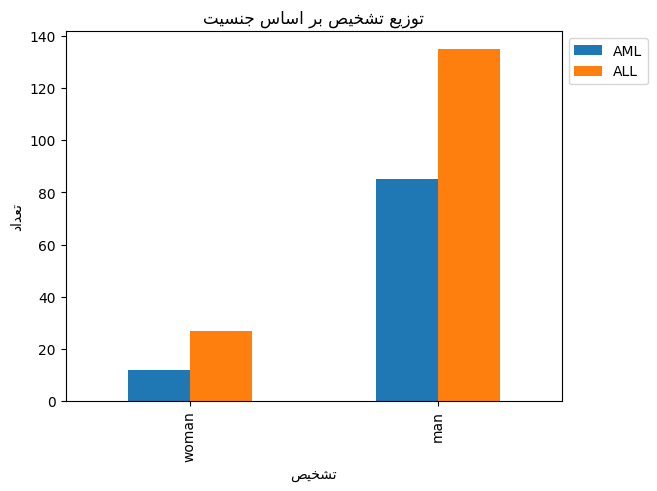

In [28]:
table.plot(kind='bar')
plt.title(get_display(arabic_reshaper.reshape('توزیع تشخیص بر اساس جنسیت')))
plt.xlabel(get_display(arabic_reshaper.reshape('تشخیص')))
plt.ylabel(get_display(arabic_reshaper.reshape('تعداد')))
plt.legend(['AML', 'ALL'], bbox_to_anchor=(1, 1))
plt.show()


میانگین سن در جنس مرد: 6.15 | | | میانگین سن در جنس زن: 6.27


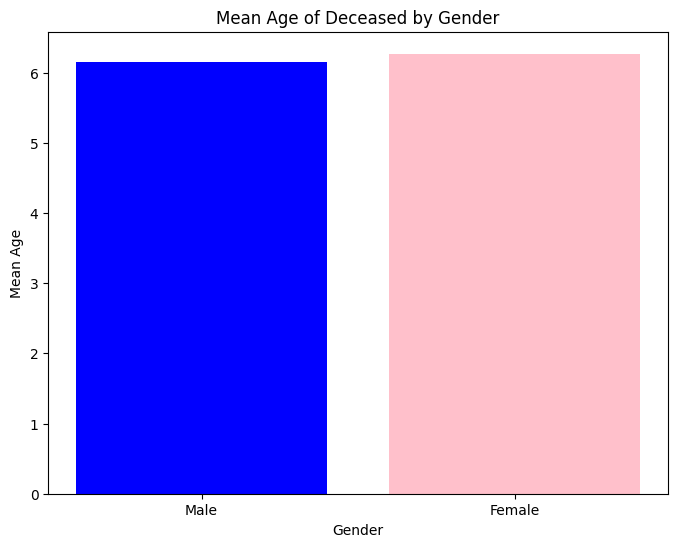

In [29]:
mean_age_male = df_next[df_next['Gender'] == 1]['Age'].mean()
mean_age_female = df_next[df_next['Gender'] == 0]['Age'].mean()
print(f"میانگین سن در جنس مرد: {mean_age_male:.2f} | | | میانگین سن در جنس زن: {mean_age_female:.2f}")

mean_ages = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Mean Age': [mean_age_male, mean_age_female]
})

plt.figure(figsize=(8, 6))
plt.bar(mean_ages['Gender'], mean_ages['Mean Age'], color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Mean Age')
plt.title('Mean Age of Deceased by Gender')
plt.show()

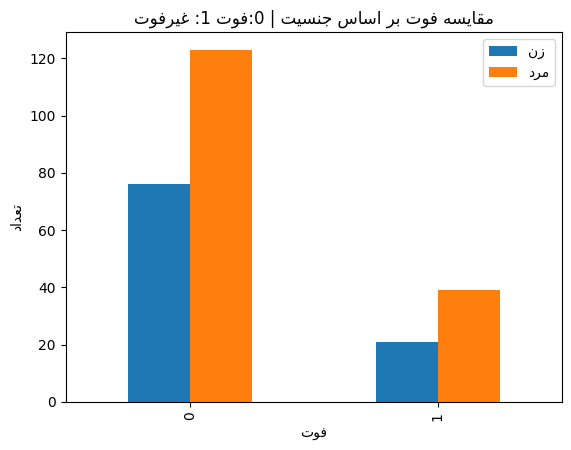

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

table = pd.crosstab(df_next['نتیجه ی درمان'], df_next['Gender'])
ax = table.plot(kind='bar')

plt.title(get_display(arabic_reshaper.reshape('مقایسه فوت بر اساس جنسیت | 0:فوت 1: غیرفوت')))
plt.xlabel(get_display(arabic_reshaper.reshape('فوت')))
plt.ylabel(get_display(arabic_reshaper.reshape('تعداد')))

plt.legend([get_display(arabic_reshaper.reshape("زن")), get_display(arabic_reshaper.reshape("مرد"))], loc='upper right', bbox_to_anchor=(1, 1))
plt.show()


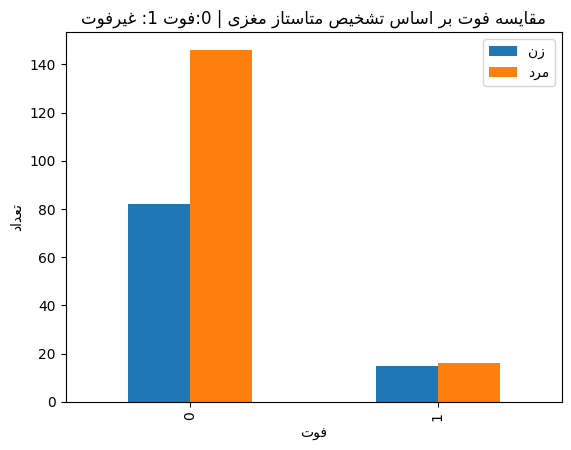

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

table = pd.crosstab(df_next['ت تشخیص متاستاز مغزی'], df_next['Gender'])
ax = table.plot(kind='bar')

plt.title(get_display(arabic_reshaper.reshape('مقایسه فوت بر اساس تشخیص متاستاز مغزی | 0:فوت 1: غیرفوت')))
plt.xlabel(get_display(arabic_reshaper.reshape('فوت')))
plt.ylabel(get_display(arabic_reshaper.reshape('تعداد')))
plt.legend([get_display(arabic_reshaper.reshape("زن")), get_display(arabic_reshaper.reshape("مرد"))], loc='upper right', bbox_to_anchor=(1, 1))

plt.show()

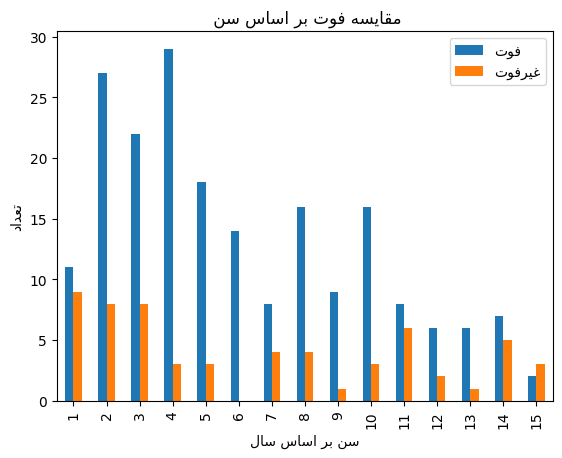

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

table = pd.crosstab(df_next['Age'], df_next['نتیجه ی درمان'])
ax = table.plot(kind='bar')

plt.title(get_display(arabic_reshaper.reshape('مقایسه فوت بر اساس سن ')))
plt.xlabel(get_display(arabic_reshaper.reshape('سن بر اساس سال')))
plt.ylabel(get_display(arabic_reshaper.reshape('تعداد')))
plt.legend([get_display(arabic_reshaper.reshape("فوت")), get_display(arabic_reshaper.reshape("غیرفوت"))], loc='upper right', bbox_to_anchor=(1, 1))

plt.show()

<Axes: >

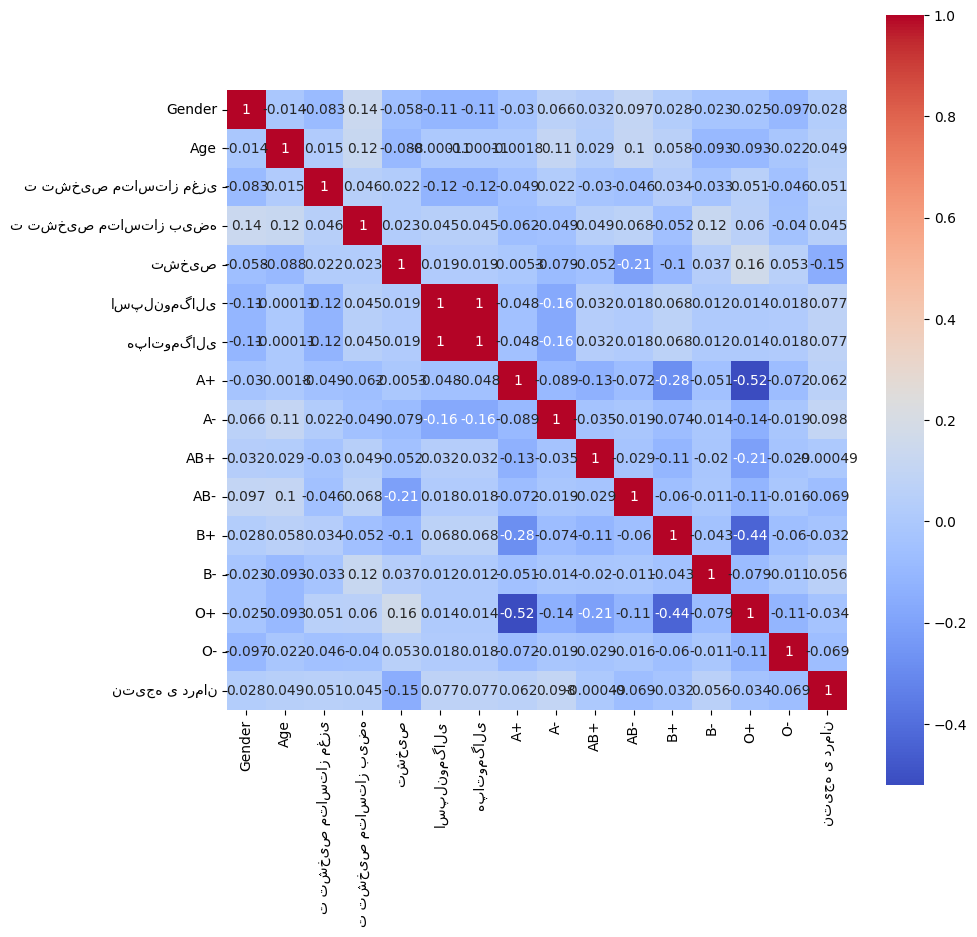

In [33]:
corr = df_next.corr()
plt.figure(figsize=(10,10))
seaborn.heatmap(corr,cmap="coolwarm",annot=True,square=True)

# train test split

#### تقسیم دیتا به بخش های تست و آموزش

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=0)

# StandardScaler

#### استاندارد کردن داده ها

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# DecisionTreeClassifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

#### پیش بینی مدل برای ارزیابی مدل

In [37]:
y_pred_DecidionTree = tree.predict(x_test)

In [38]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred_DecidionTree))
print(f"دقت مدل : {accuracy_score(y_test,y_pred_DecidionTree):.3f}")

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.22      0.33      0.27         6

    accuracy                           0.72        39
   macro avg       0.54      0.56      0.55        39
weighted avg       0.77      0.72      0.74        39

دقت مدل : 0.718


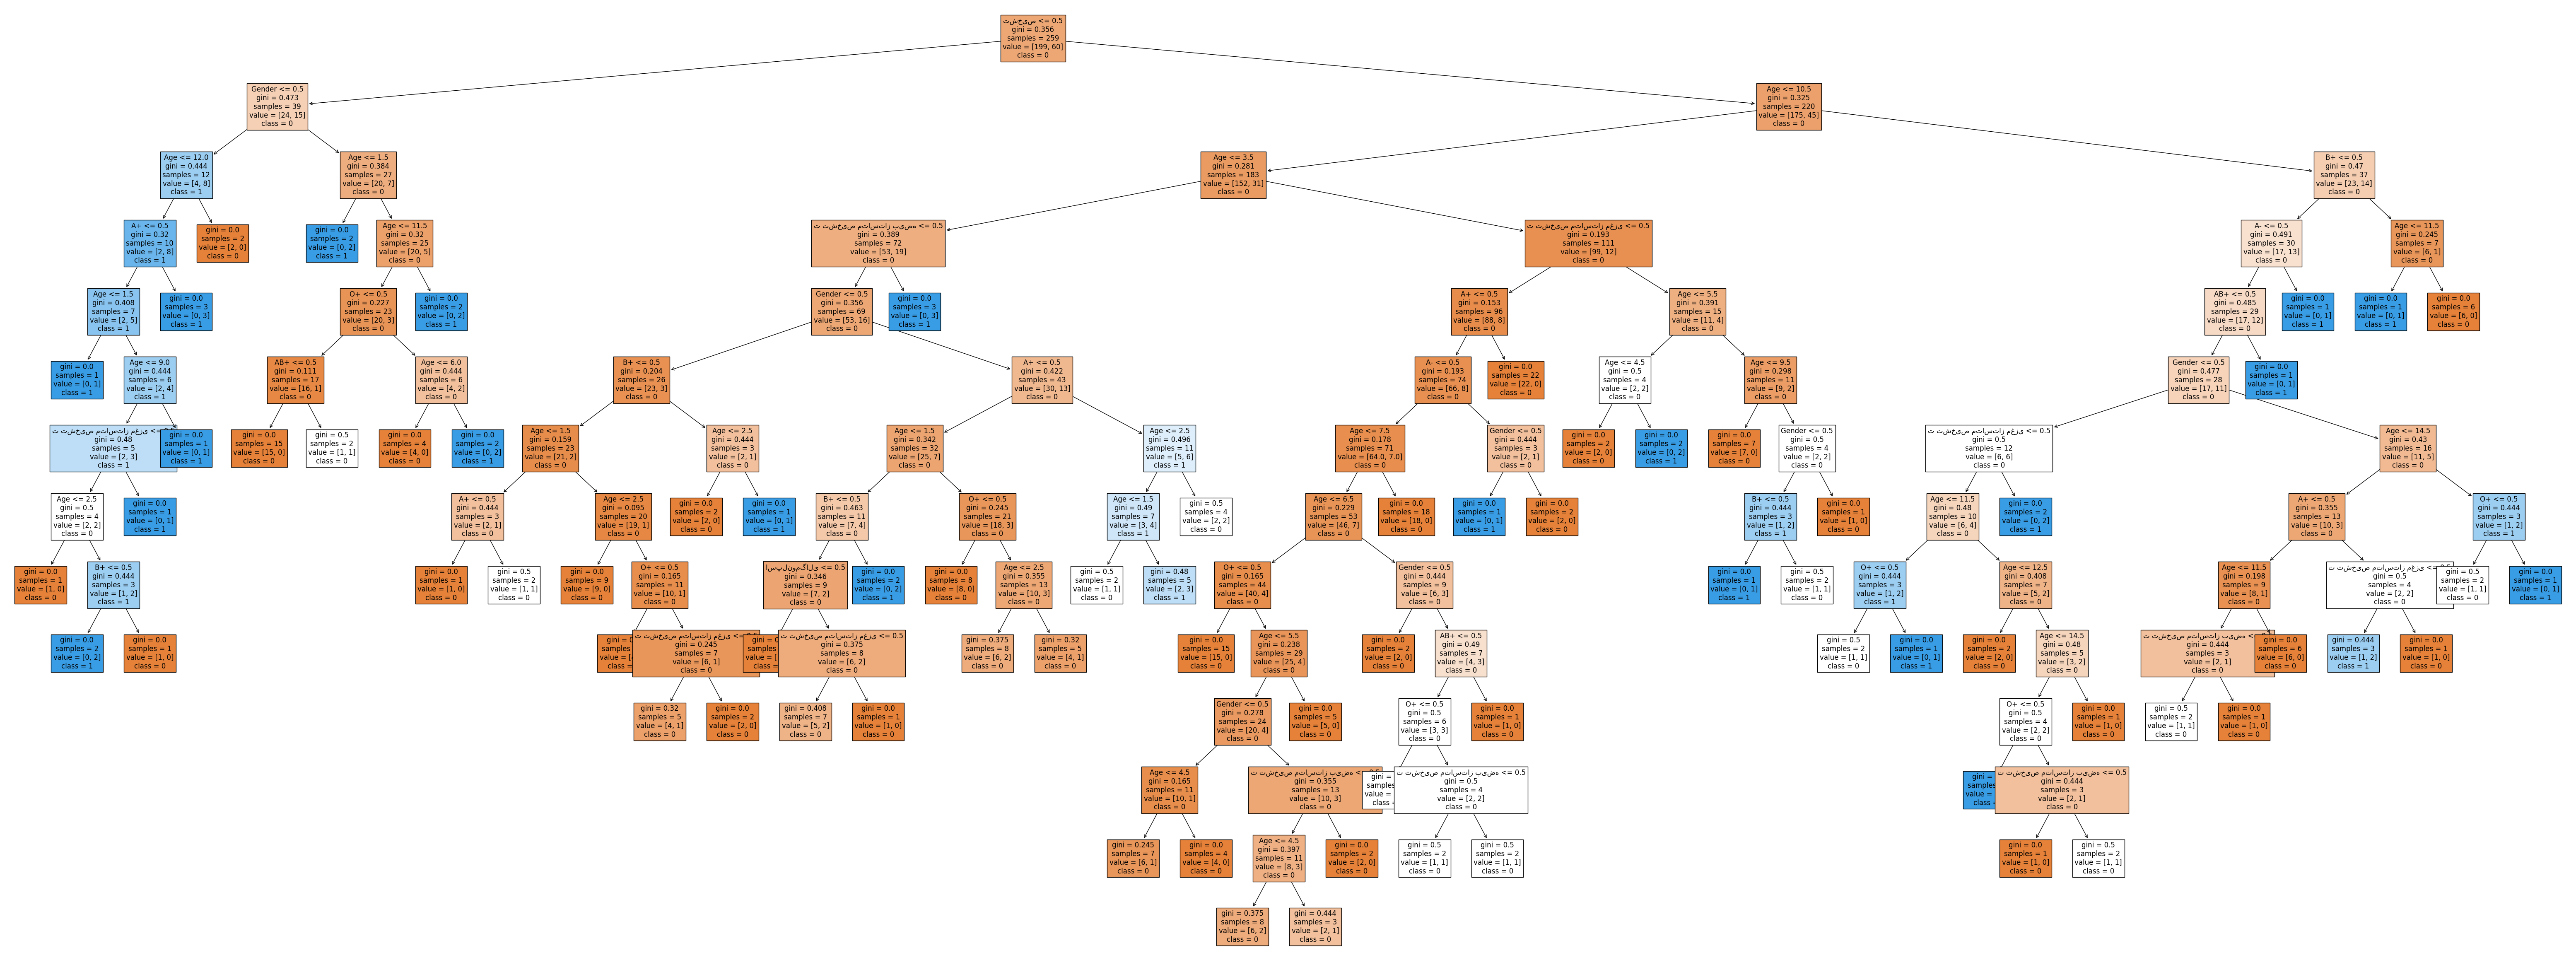

'decision_tree.pdf'

In [66]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import export_graphviz

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

clf = DecisionTreeClassifier()
clf = clf.fit(X, y)


plt.figure(figsize=(80,30))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_.astype(str), fontsize=12)
plt.show()
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X.columns,  
                           class_names=clf.classes_.astype(str),  
                           filled=True, rounded=True,  
                           special_characters=True, 
                           proportion=False,  
                           precision=2,  
                           fontname='helvetica',  
                           )  

graph = graphviz.Source(dot_data) 
graph.render("decision_tree")  


# RandomForest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 0)
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [40]:
y_pred_RandomForest = rfc.predict(x_test)

In [41]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred_RandomForest))
print(f"دقت مدل : {accuracy_score(y_test,y_pred_RandomForest):.3f}")

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        33
           1       0.33      0.33      0.33         6

    accuracy                           0.79        39
   macro avg       0.61      0.61      0.61        39
weighted avg       0.79      0.79      0.79        39

دقت مدل : 0.795


# CatBoost

In [42]:
from catboost import CatBoostClassifier, Pool

In [43]:
catboost = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    verbose=True
)

catboost.fit(x_train, y_train, eval_set=(x_test, y_test), plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6548641	test: 0.6602610	best: 0.6602610 (0)	total: 96.1ms	remaining: 1m 35s
1:	learn: 0.6217336	test: 0.6230476	best: 0.6230476 (1)	total: 97.2ms	remaining: 48.5s
2:	learn: 0.5955285	test: 0.5946456	best: 0.5946456 (2)	total: 98.7ms	remaining: 32.8s
3:	learn: 0.5694043	test: 0.5765228	best: 0.5765228 (3)	total: 99.6ms	remaining: 24.8s
4:	learn: 0.5515773	test: 0.5584403	best: 0.5584403 (4)	total: 101ms	remaining: 20s
5:	learn: 0.5405268	test: 0.5418623	best: 0.5418623 (5)	total: 102ms	remaining: 16.8s
6:	learn: 0.5325781	test: 0.5293643	best: 0.5293643 (6)	total: 102ms	remaining: 14.5s
7:	learn: 0.5117859	test: 0.5197385	best: 0.5197385 (7)	total: 103ms	remaining: 12.8s
8:	learn: 0.5024902	test: 0.5120977	best: 0.5120977 (8)	total: 106ms	remaining: 11.6s
9:	learn: 0.4961151	test: 0.5071833	best: 0.5071833 (9)	total: 107ms	remaining: 10.6s
10:	learn: 0.4913865	test: 0.5018959	best: 0.5018959 (10)	total: 108ms	remaining: 9.68s
11:	learn: 0.4805759	test: 0.4879896	best: 0.4879

In [44]:
y_pred_catboost = catboost.predict(x_test)

In [45]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred_catboost))
print(f"دقت مدل : {accuracy_score(y_test,y_pred_catboost):.3f}")

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        33
           1       0.00      0.00      0.00         6

    accuracy                           0.85        39
   macro avg       0.42      0.50      0.46        39
weighted avg       0.72      0.85      0.78        39

دقت مدل : 0.846


# CoxPHFitter

##### مدل کاکس

In [46]:
from lifelines import CoxPHFitter

In [47]:
datacox = pd.read_csv('DATA1.csv')
df_cox = datacox.iloc[:,3:5]

### محاسبه زمان بر اساس روز برای الگوریتم کاکس

In [48]:
import pandas as pd

# تبدیل ستون‌های admission و Release_date به فرمت تاریخ با مدیریت خطاها
df_cox['admission'] = pd.to_datetime(df_cox['admission'], format='%y/%m/%d', errors='coerce')
df_cox['Release_date'] = pd.to_datetime(df_cox['Release_date'], format='%y/%m/%d', errors='coerce')

invalid_dates = df_cox[df_cox['admission'].isna() | df_cox['Release_date'].isna()]
if not invalid_dates.empty:
    print("Invalid dates found:")
    print(invalid_dates)
   
    df_cox = df_cox.dropna(subset=['admission', 'Release_date'])


df_cox['time'] = (df_cox['Release_date'] - df_cox['admission']).dt.days
print(df_cox.head())


Invalid dates found:
     admission Release_date
53  1983-12-19          NaT
66         NaT   1989-01-10
161 1990-02-28          NaT
162        NaT   1990-05-01
167 1990-04-18          NaT
174 1990-10-12          NaT
179 1990-09-16          NaT
203 1991-11-24          NaT
211 1992-03-11          NaT
227 1992-11-06          NaT
229 1992-07-06          NaT
231 1992-08-03          NaT
   admission Release_date  time
0 1982-10-02   1986-02-25  1242
1 1982-08-13   1985-12-25  1230
2 1982-08-08   1985-10-02  1151
3 1981-12-12   1991-12-08  3648
4 1982-05-18   1985-06-21  1130


In [49]:
dataforcox = pd.concat([dataclean,df_cox],axis=1)

In [50]:
dataforcox.drop(['admission','Release_date'],axis=1,inplace=True)

In [51]:
dataforcox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                259 non-null    int64  
 1   Age                   259 non-null    int32  
 2   ت تشخیص متاستاز مغزی  259 non-null    int32  
 3   ت تشخیص متاستاز بیضه  259 non-null    int32  
 4   تشخیص                 259 non-null    int64  
 5   اسپلنومگالی           259 non-null    int32  
 6   هپاتومگالی            259 non-null    int32  
 7   نتیجه ی درمان         259 non-null    int32  
 8   A+                    259 non-null    int32  
 9   A-                    259 non-null    int32  
 10  AB+                   259 non-null    int32  
 11  AB-                   259 non-null    int32  
 12  B+                    259 non-null    int32  
 13  B-                    259 non-null    int32  
 14  O+                    259 non-null    int32  
 15  O-                    2

In [52]:
dataforcox

,Gender,Age,ت تشخیص متاستاز مغزی,ت تشخیص متاستاز بیضه,تشخیص,اسپلنومگالی,هپاتومگالی,نتیجه ی درمان,A+,A-,AB+,AB-,B+,B-,O+,O-,time
0,1,3,0,1,1,1,1,1,0,0,0,0,0,1,0,0,1242.0
1,1,11,0,0,1,1,1,1,0,0,0,0,0,0,1,0,1230.0
2,1,5,0,0,1,1,1,1,0,0,0,0,0,0,1,0,1151.0
3,0,10,1,0,1,1,1,1,0,0,0,0,1,0,0,0,3648.0
4,0,11,0,0,1,1,1,1,0,0,0,0,0,0,1,0,1130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1.0
255,1,3,1,0,0,1,1,0,0,0,0,0,0,0,1,0,81.0
256,1,10,0,0,0,1,1,0,0,0,0,0,1,0,0,0,685.0
257,1,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,26.0


In [53]:
column_to_move = 'نتیجه ی درمان'
df = dataforcox[[col for col in dataforcox.columns if col != column_to_move] + [column_to_move]]

In [54]:
df['time'].isnull().sum()

12

In [55]:
mean_time = df['time'].mean()

# پر کردن مقادیر null با میانگین
df['time'].fillna(mean_time, inplace=True)

In [56]:
df['time'].isnull().sum()

0

In [57]:
df.isnull().sum()

Gender                  0
Age                     0
ت تشخیص متاستاز مغزی    0
ت تشخیص متاستاز بیضه    0
تشخیص                   0
اسپلنومگالی             0
هپاتومگالی              0
A+                      0
A-                      0
AB+                     0
AB-                     0
B+                      0
B-                      0
O+                      0
O-                      0
time                    0
نتیجه ی درمان           0
dtype: int64

In [58]:
from lifelines import CoxPHFitter
import pandas as pd
from lifelines.statistics import multivariate_logrank_test



cph = CoxPHFitter()
results = multivariate_logrank_test(df['time'], df['تشخیص'], df['نتیجه ی درمان'])
results.print_summary()



<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
          10.61 <0.005      9.80